<a href="https://colab.research.google.com/github/joohoshin/Python_Basic/blob/master/15_2_Pivot_table.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pivot_table

피벗테이블을 활용하면 테이터를 쉽게 정리할 수 있습니다. 
table = pd.pivot_table(df, values='D', index=['A', 'B'],
                    columns=['C'], aggfunc=np.sum)

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html

아파트 실거래가를 데이터를 정리해봅시다. 

http://rtdown.molit.go.kr/

In [1]:
from google.colab import drive
drive.mount('/g')

Drive already mounted at /g; to attempt to forcibly remount, call drive.mount("/g", force_remount=True).


In [2]:
import pandas as pd

# data 읽기
data = pd.read_csv('/g/My Drive/Python_202002/아파트(매매)__실거래가_20200919105434.csv', encoding='cp949',
                   skiprows = 15)  #skiprows 옵션을 통해 불필요한 행을 건너뛸수 있습니다

In [3]:
data

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명
0,강원도 강릉시 견소동,202,0202,0,송정한신,39.0800,202008,4,"11,800",7,1997,경강로2539번길 8
1,강원도 강릉시 견소동,202,0202,0,송정한신,43.3800,202008,11,"12,500",12,1997,경강로2539번길 8
2,강원도 강릉시 견소동,202,0202,0,송정한신,84.9150,202008,13,"16,350",10,1997,경강로2539번길 8
3,강원도 강릉시 견소동,202,0202,0,송정한신,39.0800,202008,26,"8,940",4,1997,경강로2539번길 8
4,강원도 강릉시 견소동,202,0202,0,송정한신,84.9300,202008,29,"14,500",2,1997,경강로2539번길 8
...,...,...,...,...,...,...,...,...,...,...,...,...
48153,충청북도 충주시 호암동,1191,1191,0,호암 힐데스하임,84.8900,202008,15,"32,700",9,2019,호암토성2로 1
48154,충청북도 충주시 호암동,905,0905,0,호암동수채,84.9289,202008,24,"18,600",1,2007,호암중앙1로 47
48155,충청북도 충주시 호암동,221-23,0221,23,호암리버빌(1단지),84.6800,202008,8,"15,000",7,2002,원호암5길 32
48156,충청북도 충주시 호암동,221-23,0221,23,호암리버빌(1단지),84.6800,202008,31,"16,450",5,2002,원호암5길 32


In [4]:
data.columns

Index(['시군구', '번지', '본번', '부번', '단지명', '전용면적(㎡)', '계약년월', '계약일', '거래금액(만원)',
       '층', '건축년도', '도로명'],
      dtype='object')

In [5]:
# 연산을 위해 숫자형으로 되어 있는지 확인
data.dtypes

시군구          object
번지           object
본번           object
부번            int64
단지명          object
전용면적(㎡)     float64
계약년월          int64
계약일           int64
거래금액(만원)     object
층             int64
건축년도          int64
도로명          object
dtype: object

df.str.replace를 통해 한번에 컬럼의 문자열을 변경할 수 있다

In [6]:
# 문자로 인식된 것을 숫자로 바꾼다. 그러려면 ,를 먼저 삭제해야 한다
data['거래금액(만원)'] = data['거래금액(만원)'].str.replace(',','')   


In [7]:
data['거래금액(만원)']

0        11800
1        12500
2        16350
3         8940
4        14500
         ...  
48153    32700
48154    18600
48155    15000
48156    16450
48157    15500
Name: 거래금액(만원), Length: 48158, dtype: object

astype()을 통해서 데이터 타입 변경이 가능하다

In [8]:
data['거래금액(만원)'] = data['거래금액(만원)'].astype('int')

In [9]:
# 비교를 위해 평당가격을 계산한다. 
df = data.assign(평당단가 = data['거래금액(만원)']/data['전용면적(㎡)'])

In [10]:
df

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,평당단가
0,강원도 강릉시 견소동,202,0202,0,송정한신,39.0800,202008,4,11800,7,1997,경강로2539번길 8,301.944729
1,강원도 강릉시 견소동,202,0202,0,송정한신,43.3800,202008,11,12500,12,1997,경강로2539번길 8,288.151222
2,강원도 강릉시 견소동,202,0202,0,송정한신,84.9150,202008,13,16350,10,1997,경강로2539번길 8,192.545487
3,강원도 강릉시 견소동,202,0202,0,송정한신,39.0800,202008,26,8940,4,1997,경강로2539번길 8,228.761515
4,강원도 강릉시 견소동,202,0202,0,송정한신,84.9300,202008,29,14500,2,1997,경강로2539번길 8,170.728836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48153,충청북도 충주시 호암동,1191,1191,0,호암 힐데스하임,84.8900,202008,15,32700,9,2019,호암토성2로 1,385.204382
48154,충청북도 충주시 호암동,905,0905,0,호암동수채,84.9289,202008,24,18600,1,2007,호암중앙1로 47,219.006722
48155,충청북도 충주시 호암동,221-23,0221,23,호암리버빌(1단지),84.6800,202008,8,15000,7,2002,원호암5길 32,177.137459
48156,충청북도 충주시 호암동,221-23,0221,23,호암리버빌(1단지),84.6800,202008,31,16450,5,2002,원호암5길 32,194.260746


### 경기도 안양시 분석
* 지역 편차가 크므로 한개의 시에 대해서 아파트 가격 요인을 분석해봅시다

In [11]:
df.시군구.unique()

array(['강원도 강릉시 견소동', '강원도 강릉시 교동', '강원도 강릉시 내곡동', ..., '충청북도 충주시 칠금동',
       '충청북도 충주시 풍동', '충청북도 충주시 호암동'], dtype=object)

In [12]:
# 안양시 선택
안양 = df.시군구.str.contains('안양')

In [13]:
안양

0        False
1        False
2        False
3        False
4        False
         ...  
48153    False
48154    False
48155    False
48156    False
48157    False
Name: 시군구, Length: 48158, dtype: bool

In [14]:
anyang_df = df[안양]

In [15]:
anyang_df.head()

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,평당단가
9176,경기도 안양동안구 관양동,1587,1587,0,공작럭키,49.8,202008,8,33000,20,1993,학의로 168,662.650602
9177,경기도 안양동안구 관양동,1587,1587,0,공작럭키,49.8,202008,15,35000,3,1993,학의로 168,702.811245
9178,경기도 안양동안구 관양동,1587,1587,0,공작럭키,49.8,202008,21,36900,6,1993,학의로 168,740.963855
9179,경기도 안양동안구 관양동,1587,1587,0,공작럭키,49.8,202008,21,31900,2,1993,학의로 168,640.562249
9180,경기도 안양동안구 관양동,1587,1587,0,공작럭키,49.8,202008,21,35800,14,1993,학의로 168,718.875502


In [16]:
# 경기도 안양시 이외에 안양이 들어간 곳이 있는 확인
anyang_df.시군구.unique()

array(['경기도 안양동안구 관양동', '경기도 안양동안구 비산동', '경기도 안양동안구 평촌동', '경기도 안양동안구 호계동',
       '경기도 안양만안구 박달동', '경기도 안양만안구 석수동', '경기도 안양만안구 안양동'], dtype=object)

In [17]:
# 분석에 활용할 데이터만 선택
anyang_df = anyang_df.filter(['층','건축년도','전용면적','평당단가'])

In [18]:
anyang_df.head()

,층,건축년도,평당단가
9176,20,1993,662.650602
9177,3,1993,702.811245
9178,6,1993,740.963855
9179,2,1993,640.562249
9180,14,1993,718.875502


In [19]:
anyang_df.dtypes

층         int64
건축년도      int64
평당단가    float64
dtype: object

In [20]:
anyang_df = anyang_df.astype({'층':'float', '건축년도':'int'})

In [21]:
anyang_df.dtypes

층       float64
건축년도      int64
평당단가    float64
dtype: object

In [22]:
pivot = pd.pivot_table(anyang_df, values='평당단가', index=['건축년도'], aggfunc='mean')

In [23]:
pivot

,평당단가
건축년도,
1978,420.168067
1979,547.639818
1981,706.530615
1982,402.140055
1983,553.238810
1984,509.410147
1985,608.440718
1987,344.014672
1988,451.349083


colab에서 한글 출력 해결

https://pinkwink.kr/1255

In [24]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


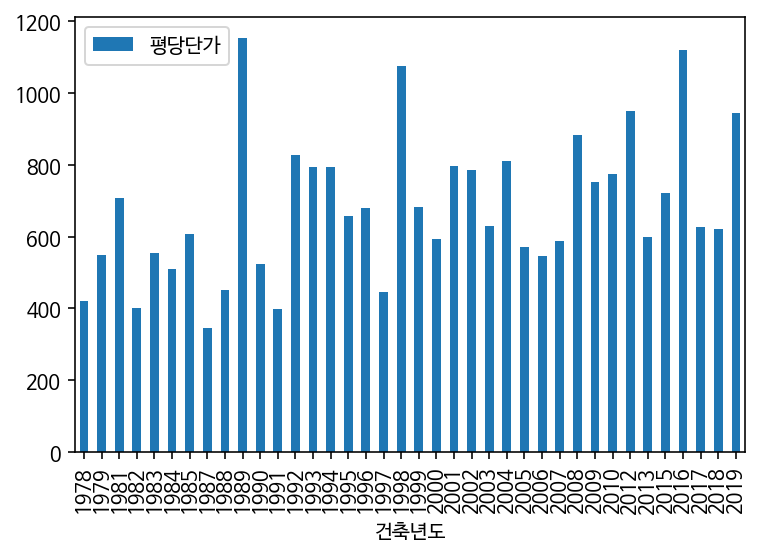

In [25]:
pivot.plot.bar()

단지별로 가격을 알아봅시다

In [26]:
pivot2 = pd.pivot_table(df, values='평당단가', index=['시군구','단지명'], aggfunc='mean')

In [27]:
pivot2.head()

평당단가
시군구         단지명                        
강원도 강릉시 견소동 송정한신             236.426358
            송정해변신도브래뉴아파트     281.362024
강원도 강릉시 교동  강릉 교동 풍림아이원 아파트  393.707941
            강릉교동롯데캐슬1단지      260.330187
            강릉교동롯데캐슬2단지      364.768108

In [28]:
# 가장 비싼 단지
pivot2.sort_values('평당단가', ascending= False)[:10]

,,평당단가
시군구,단지명,
서울특별시 성동구 성수동1가,트리마제,3829.693151
서울특별시 송파구 잠실동,리센츠,3549.494220
서울특별시 서초구 잠원동,아크로리버뷰신반포,3466.424730
서울특별시 강남구 압구정동,"현대5차(71,72동)",3465.888362
서울특별시 강남구 대치동,래미안대치팰리스,3460.683670
서울특별시 서초구 반포동,반포 주공1단지,3361.937553
서울특별시 서초구 잠원동,신반포10,3343.663597
서울특별시 강남구 압구정동,"현대14차(203,204,205,206동)",3334.635043
서울특별시 강남구 개포동,디에이치아너힐즈,3319.108582


In [29]:
# 가장 저렴한 단지
pivot2.sort_values('평당단가')[:10]

,,평당단가
시군구,단지명,
전라남도 강진군 병영면 성남리,상우빌라,17.674090
전라남도 광양시 태인동,동광(부영),20.263425
전라북도 군산시 나운동,현대1,29.239766
경상북도 구미시 선산읍 화조리,청자,29.274145
전라북도 익산시 황등면 율촌리,황등,29.891304
충청남도 홍성군 구항면 오봉리,온누리,32.917533
경상북도 경주시 외동읍 모화리,삼원그린,32.974662
전라북도 군산시 나운동,명성맨션,33.502648
강원도 삼척시 도계읍 도계리,한림,34.113060


In [30]:
pivot2 = pivot2.sort_values('평당단가', ascending= False)

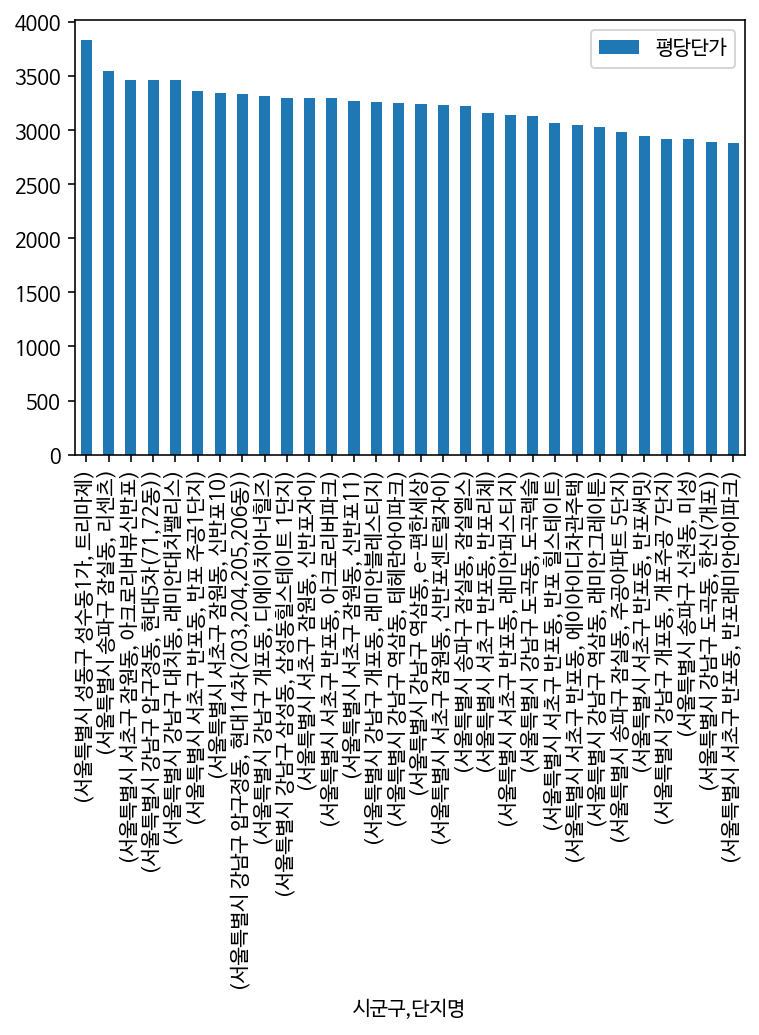

In [31]:
pivot2[:30].plot.bar()